In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm as LogNorm
from matplotlib import cm
import numpy as np
from scipy import stats
import pickle

# Confidence Intervals

In this lab, we briefly fiddle with Bayes Theorem in the context of how our background distribution can influence the shape of our observed data.

$$ P(signal|data) = \frac{P(data|signal)P(signal)}{P(data)}$$

where $P(data)$ is a normalization factor and dropped for our purposes here.

## Problem 1

We start with a background of mean=100 Poisson and size=100,000, and determine where our $5\sigma$ sensitivity is.

In [16]:
#signal-free background... poisson of mean 100
bkgd = stats.poisson.rvs(mu=100.,loc=0,size=100000)

fivesig = stats.poisson.ppf(stats.norm.cdf(5.0),mu=100)
eightsig = stats.poisson.ppf(stats.norm.cdf(8.0),mu=100)
print("\n The value corresponding to a 5-sigma threshold is {0:.3f}, and an 8-sigma threshold is {1:.3f}. \n".format(fivesig,eightsig))


 The value corresponding to a 5-sigma threshold is 154.000, and an 8-sigma threshold is 190.000. 



## Problem 2

Now we inject a signal of constant strength 202 into the background 10,000 times.

In [17]:
signal = 202.
obs = stats.poisson.rvs(mu=100.,loc=0,size=10000) + signal

data = np.append(bkgd,obs)

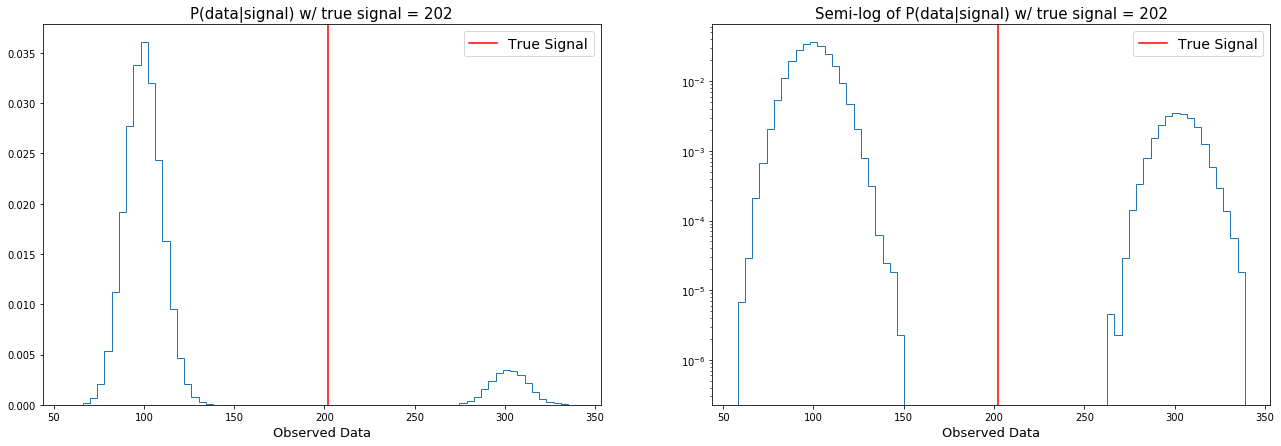

In [18]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(22,7) 

ax[0].hist(data, bins=70, histtype='step', density=True)
ax[0].set_title("P(data|signal) w/ true signal = 202",fontsize=15)
ax[0].set_xlabel("Observed Data", fontsize=13)

ax[1].hist(data, bins=70, histtype='step', density=True, log=True)
ax[1].set_title("Semi-log of P(data|signal) w/ true signal = 202",fontsize=15)
ax[1].set_xlabel("Observed Data", fontsize=13)

ax[0].axvline(202, c='red', label='True Signal')
ax[1].axvline(202, c='red', label='True Signal')
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)

plt.show()

The distribution of our observed signal looks significantly brighter than our background distribution, in such a way that can be easily distinguished. It is also brighter than our true, injected signal of 202, which means that our background distribtion is pushing it. And, not only is it pushing it; it is also fully influencing its shape. It is not as clear on the regular histogram, but we can see on the semi-log plot that their shapes are symmetrical and, for all intents & purposes, identical! Aside from relative frequency of course. And, since our poisson distribution is always greater than 0, our observed signal will always be greater than our true signal.

## Problem 3

Now I will be injecting a range of 1,000,000 signals from strength of 0 to 500 into my background (of my mean 100 poisson with a new size of 1,000,000), which extends from around $-8\sigma$ to well above $30\sigma$. The distribution I'm pulling from MUST be uniform, otherwise the $P(data)$ in our Bayes Theorem creates problems in our ability to make statements about how the probability of our signal given the data is influenced by the probability of the data given our signal.

My data will be these signals added to their background - so these dataset represents only our signals.

In [81]:
back = stats.poisson.rvs(mu=100.,loc=0,size=1000000)
sigs = stats.uniform.rvs(loc=0, scale=500, size=1000000)

d = sigs + back

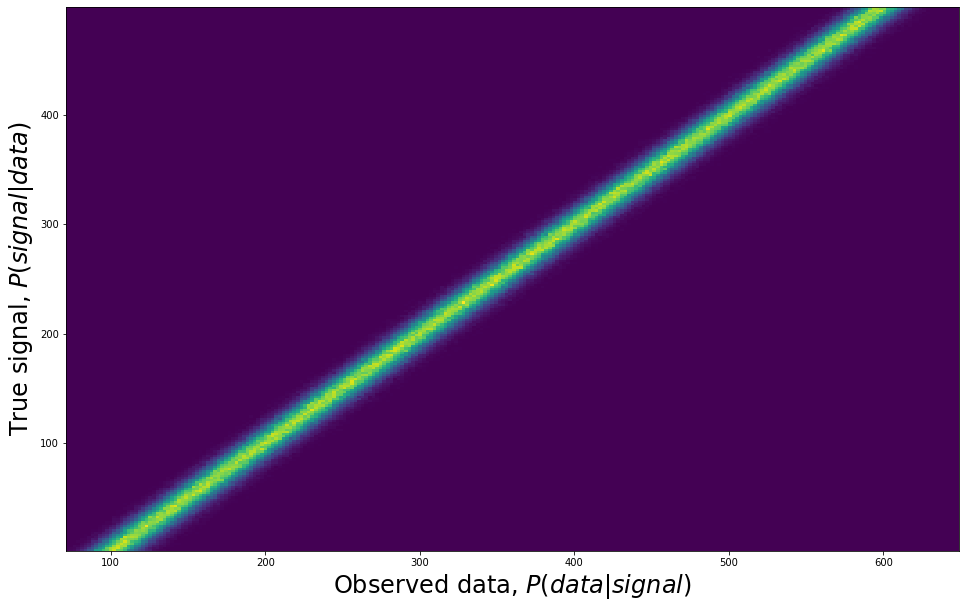

In [83]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(16,10) 

signaledges = np.linspace(0,500,250)
dataedges = np.linspace(70,650,250)

Psd, temp, temp2= np.histogram2d(d, sigs, density=True, bins=[dataedges,signaledges])

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2

plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(signal|data)$', fontsize = 24)
plt.xlabel('Observed data, $P(data|signal)$', fontsize = 24);

This 2D histogram represents the likelihood of getting an observed data point plotted against the likelihood of that data point being a true signal.

In [84]:
d202 = []
for i in range(len(d)):
    if (201.9 < sigs[i] < 202.1):
        d202.append(d[i])

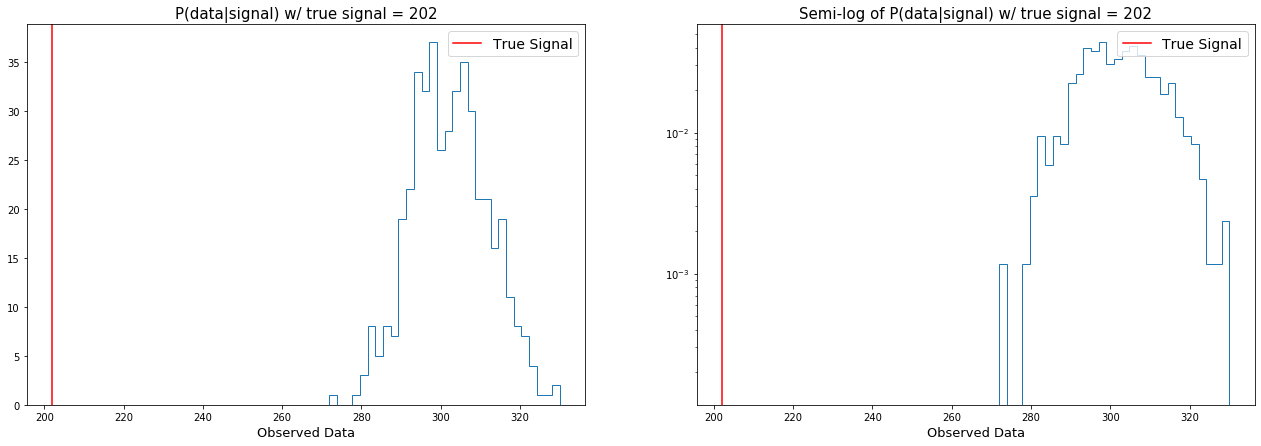

In [85]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(22,7) 

ax[0].hist(d202, bins=30, histtype='step', density=False)
ax[0].set_title("P(data|signal) w/ true signal = 202",fontsize=15)
ax[0].set_xlabel("Observed Data", fontsize=13)

ax[1].hist(d202, bins=30, histtype='step', density=True, log=True)
ax[1].set_title("Semi-log of P(data|signal) w/ true signal = 202",fontsize=15)
ax[1].set_xlabel("Observed Data", fontsize=13)

ax[0].axvline(202, c='red', label='True Signal')
ax[1].axvline(202, c='red', label='True Signal')
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)

plt.show()

Taking a horizontal slice at a specific true signal of 202 value gives the probability of getting a range of observed values.

We can see from the semi-log plot that this is basically identical to the semi-log plot in problem 2.

In [86]:
s500 = []
for i in range(len(d)):
    if (499.9 < d[i] < 500.1):
        s500.append(sigs[i])

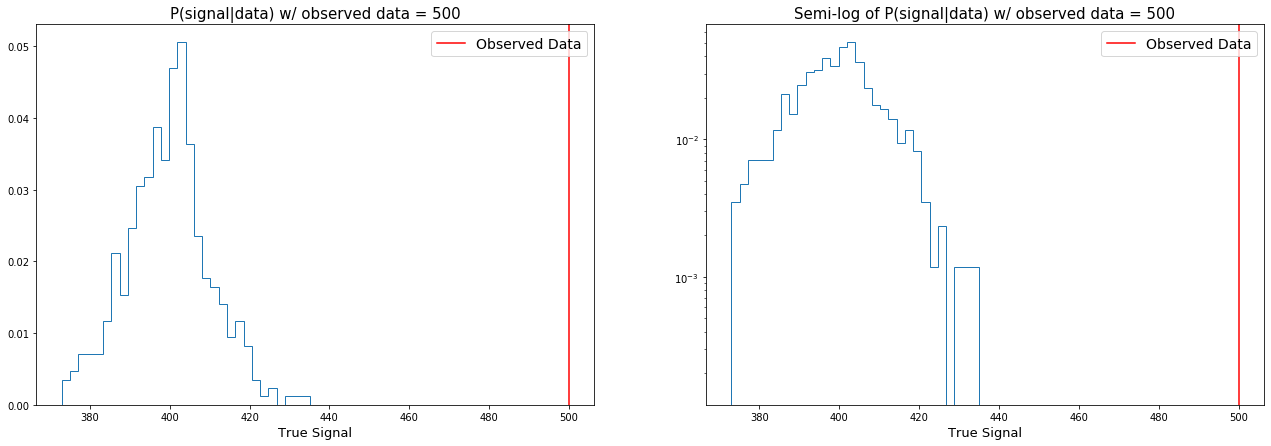

In [98]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(22,7) 

ax[0].hist(s500, bins=30, histtype='step', density=True)
ax[0].set_title("P(signal|data) w/ observed data = 500",fontsize=15)
ax[0].set_xlabel("True Signal", fontsize=13)

ax[1].hist(s500, bins=30, histtype='step', density=True, log=True)
ax[1].set_title("Semi-log of P(signal|data) w/ observed data = 500",fontsize=15)
ax[1].set_xlabel("True Signal", fontsize=13)

ax[0].axvline(500, c='red', label='Observed Data')
ax[1].axvline(500, c='red', label='Observed Data')
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)

plt.show()

Taking a vertical slice at a specific observed value of 500 gives the probability of that observed value corresponding to a range of true signals.

For our observed signal of 500, our $1\sigma$ on the true signal strength refers to the range of true signal values that fall within 68% of the above probability.

In [121]:
#length of the array of possible signals minus that times 68% to find the indices
s500 = np.sort(s500)
n = int(np.floor((len(s500)-(len(s500)*.68))/2))
bottom = s500[n]
top = s500[len(s500)-n]
L = top - bottom

print("\n The range of possible signals that fall within one sigma for an observed value of 500 are [{0:.3f},{1:.3f}]. This is {2:.3f} wide.\n".format(bottom,top,L))


 The range of possible signals that fall within one sigma for an observed value of 500 are [389.084,409.083]. This is 19.999 wide.



We can see from our 2D histogram that the likelihood of our observed signal changes linearly with the likelihood of our true frequency. No matter what frequency we have, we are adding a symmetric Poissonian noise with mean=100, so the distribution we draw of our observed signals will also be symmetric, and biased to be of strength ~100 greater than its true value.